## Python statistics essential training - 04_03_bootstrapping

Standard imports

This exercise, they surveyed people to give the mayor a grade.  The grade was between 0 and 10.

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

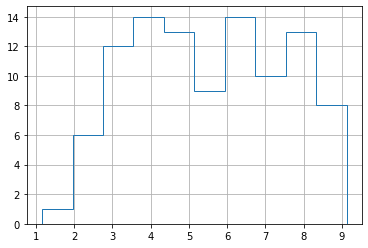

In [6]:
pop.grade.hist(histtype='step')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [22]:
# this is how to create a bootstrapped sample; notice that the mean of 5.25 is slightly different than the mean above of 5.5
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.257037
std,2.028360
min,1.160899
25%,3.921372
50%,4.964791
75%,6.676185
max,9.120705


In [23]:
# this is a boostrapped distribution of means; call the variable 'meangrade'
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

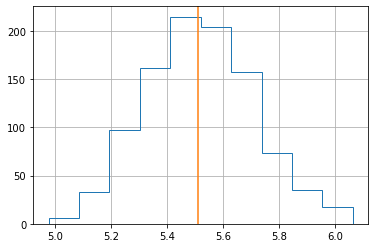

In [10]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

Note that the histogram is not a histogram of grades, it is a histogram of the means of grades. note that the mean is the same as our sample (as it should be), but there is quite a bit of variability

In [11]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.164648645727048, 5.910352484737625)

above is this is the 95% confidence interval

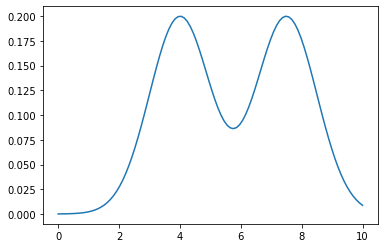

In [28]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100) # note that this is truncating the data to be between 0 and 10, since the poll asked for a number in that range
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [27]:
# this is a function to draw a single grade
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs() # this returns a random sample from the distribution
        if 0 <= v <= 10: # this is truncating the data
            return v

In [29]:
# this calls the function once
draw()

7.005123249785935

In [30]:
# create a dataset by calling the function repeatedly
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

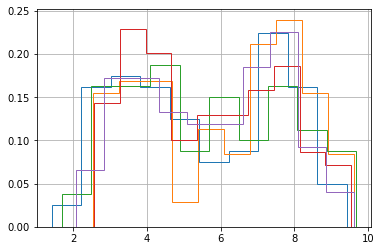

In [32]:
# create a histogram of a few of the samples
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [33]:
# this is the sampling distribution of the mean using simulation
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

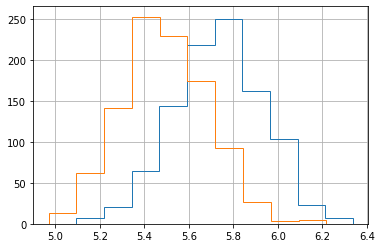

In [35]:
# compares the histogram with the boostrapped distribution
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

We see that the true sampling distribution is displaced from the boostrap estimate, but that the spreads are comparable, which justifies our approximated confidence interval